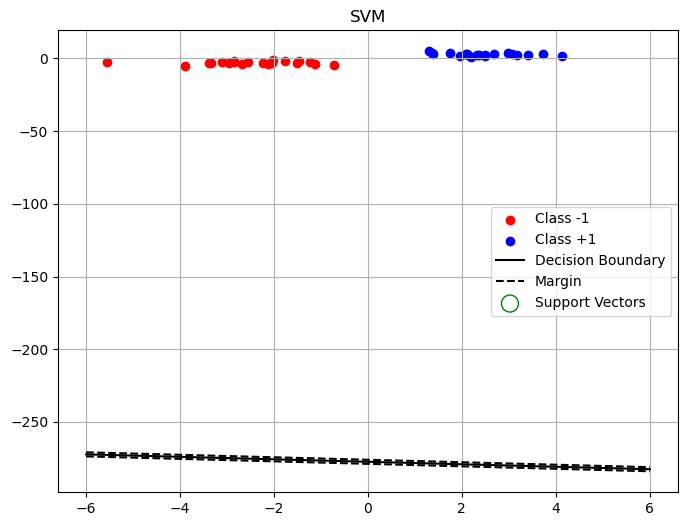

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Generate simple linearly separable dataset
np.random.seed(0)
class1 = np.random.randn(20, 2) + np.array([-3, -3])
class2 = np.random.randn(20, 2) + np.array([3, 3])

X = np.vstack((class1, class2))
y = np.hstack((-1 * np.ones(20), +1 * np.ones(20)))


def svm_train(X, y, lr=0.001, epochs=10000, lambda_param=1):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        for i, xi in enumerate(X):
            condition = y[i] * (np.dot(xi, w) + b) >= 1
            
            if condition:
                # No penalty
                w -= lr * (2 * lambda_param * w)
            else:
                # Misclassified
                w -= lr * (2 * lambda_param * w - np.dot(xi, y[i]))
                b -= lr * y[i]

    return w, b

w, b = svm_train(X, y)


# Prediction function
def predict(X):
    return np.sign(np.dot(X, w) + b)


plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(class1[:, 0], class1[:, 1], color='red', label="Class -1")
plt.scatter(class2[:, 0], class2[:, 1], color='blue', label="Class +1")

# Create decision boundary line
x_vals = np.linspace(-6, 6, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Margin lines
margin1 = -(w[0] * x_vals + b - 1) / w[1]
margin2 = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, y_vals, 'k-', label="Decision Boundary")
plt.plot(x_vals, margin1, 'k--', label="Margin")
plt.plot(x_vals, margin2, 'k--')

# Plot support vectors
distances = y * (X.dot(w) + b)
support_vectors = X[(distances >= 0.99) & (distances <= 1.01)]
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=150, facecolors='none', edgecolors='green', label='Support Vectors')

plt.title("SVM")
plt.legend()
plt.grid(True)
plt.show()
